<a href="https://colab.research.google.com/github/JunJul/2024-sp-stats21/blob/main/Math118_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')

## Read data frame

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
X, y = load_diabetes(return_X_y=True)

## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The mean squared error is {}".format(mse))
print("R Squared: {}".format(r2 * 100))

The mean squared error is 2821.750981001311
R Squared: 47.72897164322617


#### The mean squared error is really big because the model may have multicollinearity issue. However, we could try to use dimension reduction techquies to reduce complexity of the model.

## PCR Algorithm

In [ ]:
X.shape

(442, 10)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
pcr_mse = []
pcr_r2 = []
pcr_coef = []
pcr_singular_values = []

for component in range(1, 11):
  pca = PCA(n_components = component)

  reg = LinearRegression()
  pipeline = Pipeline(steps=[('pca', pca),
                            ('reg', reg)])

  # Fit the pipeline to the data
  pipeline.fit(X_train, y_train)

  # Predict the labels for the data
  y_pred = pipeline.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  linearReg = pipeline.named_steps['reg']
  pca_model = pipeline.named_steps['pca']
  coef = linearReg.coef_

  pcr_mse.append(mse)
  pcr_r2.append(r2)
  pcr_coef.append(coef)
  pcr_singular_values.append(pca_model.singular_values_)

In [ ]:
 pipeline.named_steps['pca'].components_

array([[ 0.18807449,  0.1584818 ,  0.30908225,  0.24823905,  0.35701038,
         0.35651424, -0.2759464 ,  0.44308814,  0.38417026,  0.32823454],
       [ 0.12796722, -0.36644718, -0.16748584, -0.04115022,  0.55300794,
         0.42437389,  0.55473965, -0.12873537, -0.03321714, -0.09095482],
       [ 0.41110162, -0.15990147,  0.2577451 ,  0.57475251, -0.14388176,
        -0.3303754 ,  0.28502503, -0.34488008,  0.10748489,  0.25897798],
       [ 0.43004175,  0.74047281, -0.42298047,  0.13065153,  0.0471085 ,
         0.09740767,  0.11632653, -0.05310849, -0.19755799, -0.06076851],
       [ 0.70503745, -0.27136612, -0.13517583, -0.53806746, -0.10114084,
        -0.15256641, -0.16913161,  0.09218503,  0.22548258,  0.00644724],
       [-0.2399803 , -0.00439853, -0.45657399, -0.15534556,  0.00506158,
        -0.10255797,  0.10606411, -0.04983114,  0.11000445,  0.82062207],
       [-0.17100629,  0.00485957, -0.42235033,  0.23126317,  0.10243495,
        -0.27837081,  0.03870165,  0.06103389

In [ ]:
pcr_singular_values[2]

array([1.67537701, 1.01657585, 0.93790276])

In [ ]:
pcr_coef

[array([448.99844417]),
 array([ 448.99844417, -287.10240012]),
 array([ 448.99844417, -287.10240012,  397.03754697]),
 array([ 448.99844417, -287.10240012,  397.03754697, -488.62459355]),
 array([ 448.99844417, -287.10240012,  397.03754697, -488.62459355,
         -22.29573781]),
 array([ 448.99844417, -287.10240012,  397.03754697, -488.62459355,
         -22.29573781, -267.19525783]),
 array([ 448.99844417, -287.10240012,  397.03754697, -488.62459355,
         -22.29573781, -267.19525783,   95.29055931]),
 array([ 448.99844417, -287.10240012,  397.03754697, -488.62459355,
         -22.29573781, -267.19525783,   95.29055931,  -34.89988512]),
 array([ 448.99844417, -287.10240012,  397.03754697, -488.62459355,
         -22.29573781, -267.19525783,   95.29055931,  -34.89988512,
          31.42259471]),
 array([  448.99844417,  -287.10240012,   397.03754697,  -488.62459355,
          -22.29573781,  -267.19525783,    95.29055931,   -34.89988512,
           31.42259471, -1165.9232196 ])]

## PFC

In [ ]:
def pfc(X, Y, num_directions=1):
    # Step 1: Center X
    X_centered = X - X.mean(axis=0)

    # Step 2: Fit multivariate regression of X on Y
    reg = LinearRegression().fit(Y.reshape(-1, 1), X_centered)
    X_fitted = reg.predict(Y.reshape(-1, 1))

    # Step 3: Compute the covariance matrix of fitted values
    cov_fit = np.cov(X_fitted, rowvar=False)

    # Step 4: Perform eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(cov_fit)
    sorted_indices = np.argsort(eigvals)[::-1]
    directions = eigvecs[:, sorted_indices[:num_directions]]

    # Select top `num_directions` eigenvectors
    directions = eigvecs[:, sorted_indices[:num_directions]]

    # Step 5: Project X onto the subspace
    components = X_centered @ directions

    return components, directions, eigvals

In [ ]:
from scipy.linalg import eigh
def pfc2(X, Y, num_components=1):
  X_centered = X - np.mean(X, axis=0)

    # Step 2: Compute basis function f_Y
    # Example: Use slicing as the basis function
  unique_y = np.unique(Y)
  num_slices = len(unique_y)
  f_Y = np.zeros((len(Y), num_slices))
  for i, val in enumerate(unique_y):
    f_Y[:, i] = (Y == val).astype(float) - np.mean(Y == val)

    # Step 3: Regression of X on f_Y
  F = f_Y - np.mean(f_Y, axis=0)  # Center the basis function
  B = np.linalg.pinv(F.T @ F) @ F.T @ X_centered  # Regression coefficients
  fitted_X = F @ B  # Fitted values

    # Step 4: Covariance matrix and eigen decomposition
  cov_fit = np.cov(fitted_X, rowvar=False)
  eigenvalues, eigenvectors = eigh(cov_fit)  # Use 'eigh' for symmetric matrices

    # Step 5: Select top `num_components` PFC directions
  top_indices = np.argsort(eigenvalues)[-num_components:][::-1]  # Largest eigenvalues
  PFC_directions = eigenvectors[:, top_indices]

    # Step 6: Project data onto PFC directions
  reduced_X = X_centered @ PFC_directions

  return PFC_directions, reduced_X

In [ ]:
pfc_mse = []
pfc_r2 = []
pfc_coef = []
pfc_eigenvalues = []

for component in range(1, 11):
  directions, pca_components = pfc2(X, y, num_components = component)

  X_train, X_test, y_train, y_test = train_test_split(pca_components, y, test_size=0.3, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  pfc_mse.append(mse)
  pfc_r2.append(r2)
  pfc_coef.append(model.coef_)
  # pfc_eigenvalues.append(eigvals)

In [ ]:
directions[4]

array([-0.26479518, -0.60686084, -0.05393982,  0.04077871,  0.14668689,
       -0.07433502,  0.00797768,  0.15048003,  0.07606258,  0.70816303])

In [ ]:
pfc_coef

[array([-482.83304654]),
 array([-516.47894818,  335.50096781]),
 array([-528.19666284,  351.75303794, -340.67907209]),
 array([-538.14624667,  348.14904554, -361.68521407, -381.23831024]),
 array([-540.48884803,  348.4842693 , -356.47058953, -374.21230621,
        -132.98655303]),
 array([-546.09791771,  359.69421045, -362.17842371, -368.20126716,
        -137.49890828, -220.85313177]),
 array([-546.70140642,  359.63141302, -361.8940901 , -368.07246515,
        -136.07688164, -222.25644365,  -24.2222753 ]),
 array([-546.5576464 ,  359.29887141, -361.50276076, -367.50368962,
        -136.94268669, -222.99260103,  -24.84852732,  -13.66773218]),
 array([-546.00182966,  357.38339587, -361.58979247, -367.71898478,
        -137.59557108, -223.57282496,  -23.50340551,  -14.49556628,
         -48.45189025]),
 array([ -550.84027268,   360.56790777,  -360.42727446,  -373.05468756,
         -124.94481207,  -225.98483612,   -34.59042958,   -29.21282886,
          -66.04668122, -1160.76224279])]

In [ ]:
model_mse = pd.DataFrame({'pcr_mse': pcr_mse, 'pfc_mse': pfc_mse})

In [ ]:
model_mse

,pcr_mse,pfc_mse
0,3595.265587,3433.916724
1,3523.006254,3427.203313
2,3467.698991,3250.670014
3,2809.991321,2760.878902
4,2810.797714,2809.714979
5,2891.293892,2838.835453
6,2811.366389,2821.957821
7,2832.201904,2830.213107
8,2836.815021,2836.970730
9,2821.750981,2821.750981


In [ ]:
model_r2 = pd.DataFrame({'pcr_r2': pcr_r2, 'pfc_r2': pfc_r2})

In [ ]:
model_r2

,pcr_r2,pfc_r2
0,0.334001,0.363890
1,0.347387,0.365134
2,0.357632,0.397835
3,0.479468,0.488566
4,0.479319,0.479519
5,0.464407,0.474125
6,0.479213,0.477251
7,0.475354,0.475722
8,0.474499,0.474470
9,0.477290,0.477290


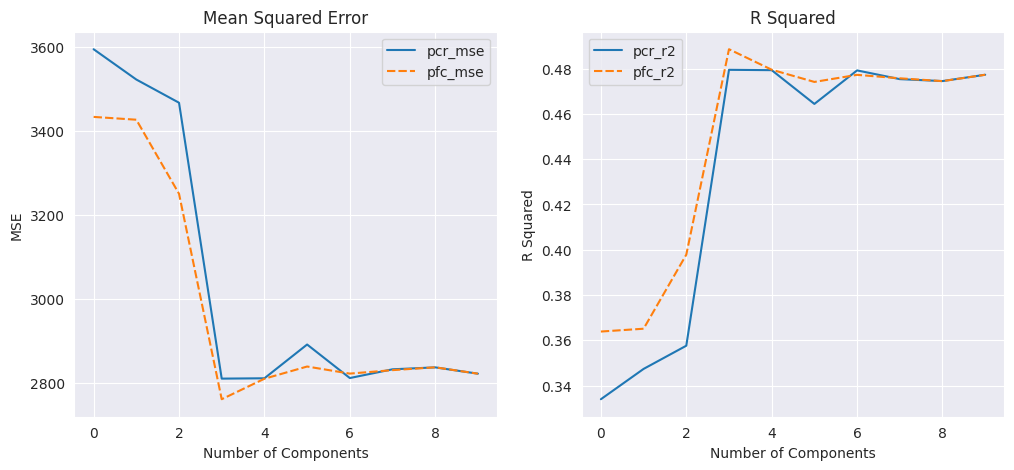

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(data=model_mse, ax = axes[0])
axes[0].set_title('Mean Squared Error')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('MSE')

sns.lineplot(data=model_r2, ax = axes[1])
axes[1].set_title('R Squared')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('R Squared')

plt.show()